In [93]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 

In [94]:
#loading the data into pandas 
diabetes_dataset = pd.read_csv('diabetes.csv')

In [95]:
# rows and columns 
diabetes_dataset.shape

(768, 9)

In [96]:
# seeing how many people are diabetic in our dataset 
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [97]:
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


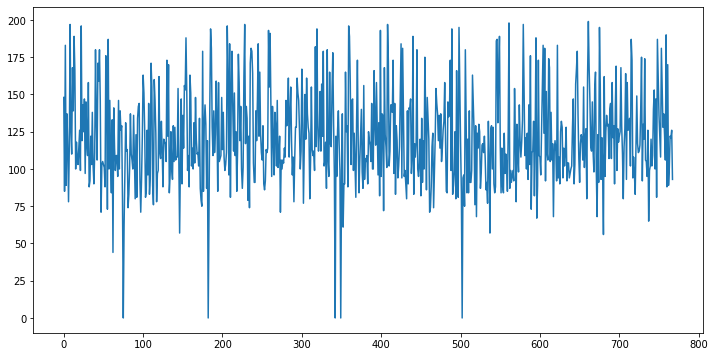

In [98]:
fig = plt.subplots(figsize=(12, 6))
plt.plot(diabetes_dataset.Glucose)

In [99]:
#separating Labels and results

x= diabetes_dataset.drop(columns = 'Outcome' , axis = 1) 
y = diabetes_dataset['Outcome']

In [100]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0              6      148             72             35        0  33.6  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [101]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [102]:
scalar = StandardScaler()

In [103]:


# taking all the data and converting the values for them into a similar range

x = scalar.fit_transform(x)

print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, stratify = y, random_state = 2)


In [105]:
print (x.shape, x_train. shape, x_test.shape)

(768, 8) (691, 8) (77, 8)


In [106]:
classifier = svm.SVC (kernel = 'linear')

# training

classifier.fit(x_train, y_train)


SVC(kernel='linear')

In [107]:
x_train_prediction = classifier.predict(x_train)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [108]:
print(train_data_accuracy)

0.784370477568741


In [109]:
x_test_prediction = classifier.predict(x_test)

test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [110]:
print(test_data_accuracy)

0.7792207792207793


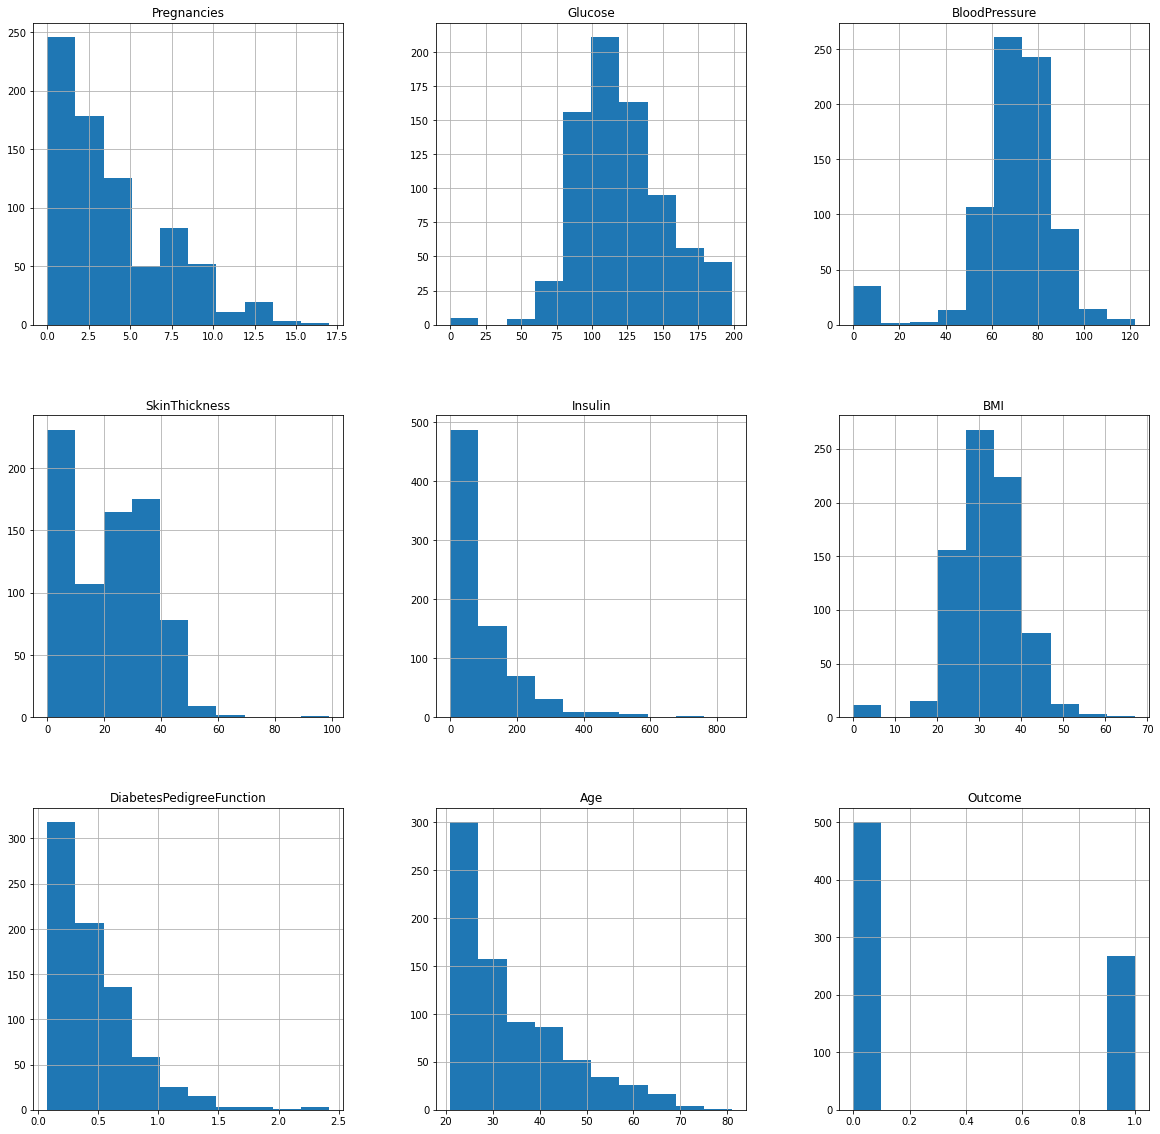

In [111]:
p = diabetes_dataset.hist(figsize=(20, 20))

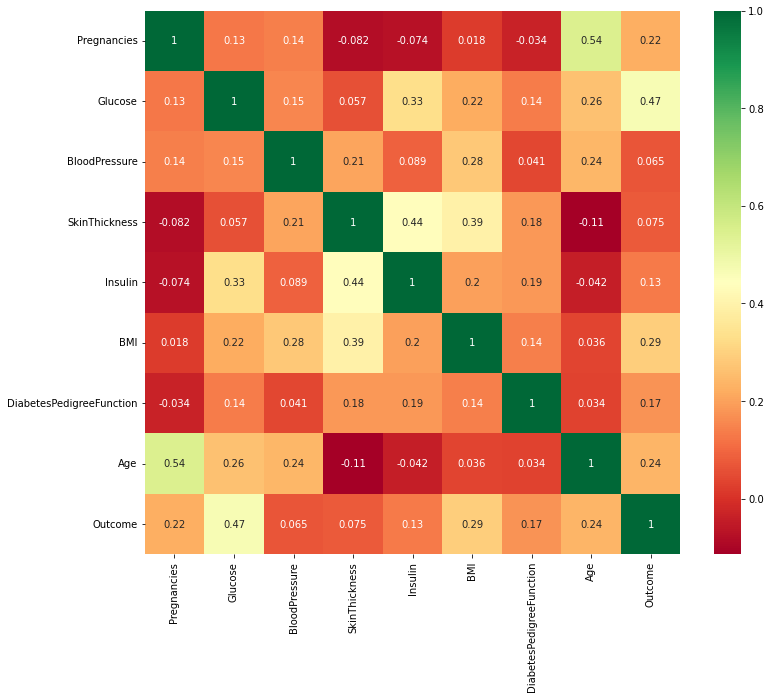

In [112]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_dataset.corr(), annot=True,cmap ='RdYlGn')

In [113]:
preg = input("Pregnancies: ")
gluc = input("Glucose: ")
bp = input("Blood Pressure: ")
skint = input("Skin Thickness: ")
insulin = input("Insulin: ")
bmi = input("BMI: ")
dpf = input("DiabetesPedigreeFunction: ")
age = input("Age: ")

input_data = (preg, gluc, bp, skint, insulin, bmi, dpf, age)

#changing the input_data to numpy array
numpy_arr = np.asarray(input_data)

# reshape the array as we are predicting for one instance 
reshaped_data = numpy_arr.reshape(1,-1)

# standardize the input data

std_data = scalar.transform(reshaped_data) 
print(std_data)

prediction = classifier.predict(std_data)

print(prediction)

if(prediction[0] == 0): 
    print("Not Diabetic") 

else:
    print("Diabetic")

[[ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]]
[1]
Diabetic


c:\Users\saran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
